In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command
import numpy as np
import os
import torch
from srcnn_files.srcnn import SRCNN
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile
import pickle
from skimage.io import imsave
from skimage.exposure import rescale_intensity

c:\Users\robho\anaconda3\envs\pipeline\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open('pickle_files/pickle_real_image_list.pkl', 'rb') as inp:
    real_image_list = pickle.load(inp)

In [4]:
img_paths = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/real_data/"
folder_names = ["90x","60x","40x","30x","20x"]

In [7]:
for i,img in enumerate(real_image_list):
    print(img.shape)
    if i == 0:
        img = np.array(img,dtype=np.float64)
        img /= np.max(img)
        img *= 255
        img = np.array(img,dtype=np.uint8)
        # imsave(f"{img_paths}/{folder_names[i]}/real_image.png",img)
        # break
    img = np.array(img,dtype=np.float64)
    img /= np.max(img)
    img *= 255
    img = np.array(img,dtype=np.uint8)
    # imsave(f"{img_paths}/{folder_names[i]}/lr_img/real_image.png",img)
    ulr_img = linear_interpolate(img,[207,54])
    ulr_img = np.array(ulr_img,dtype=np.uint8)
    # imsave(f"{img_paths}/{folder_names[i]}/ulr_img/upsampled_real_image.png",ulr_img)

(207, 54)
(138, 36)
(92, 24)
(69, 18)
(46, 12)


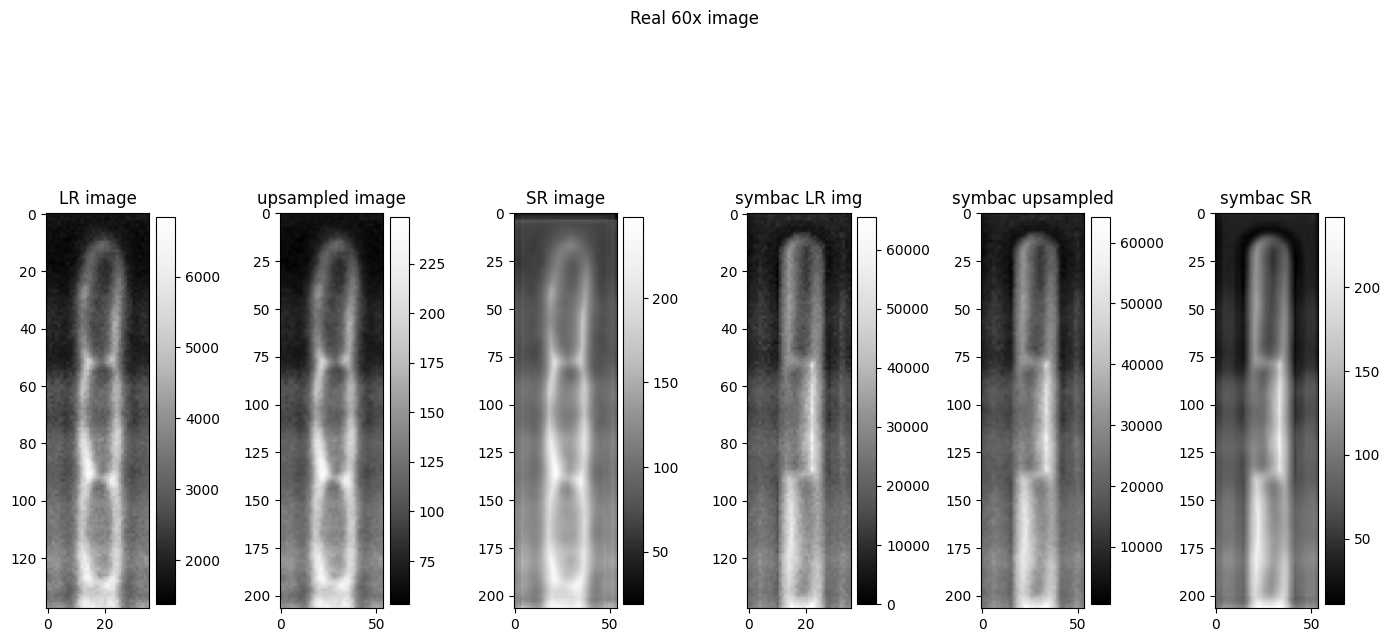

In [47]:
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 60x image")
ax0 = axs[0].imshow(real_image_list[1],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img60_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img60_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

# NEED TO TRY SR WITH THE 90X OMNIPOSE MODEL TOO

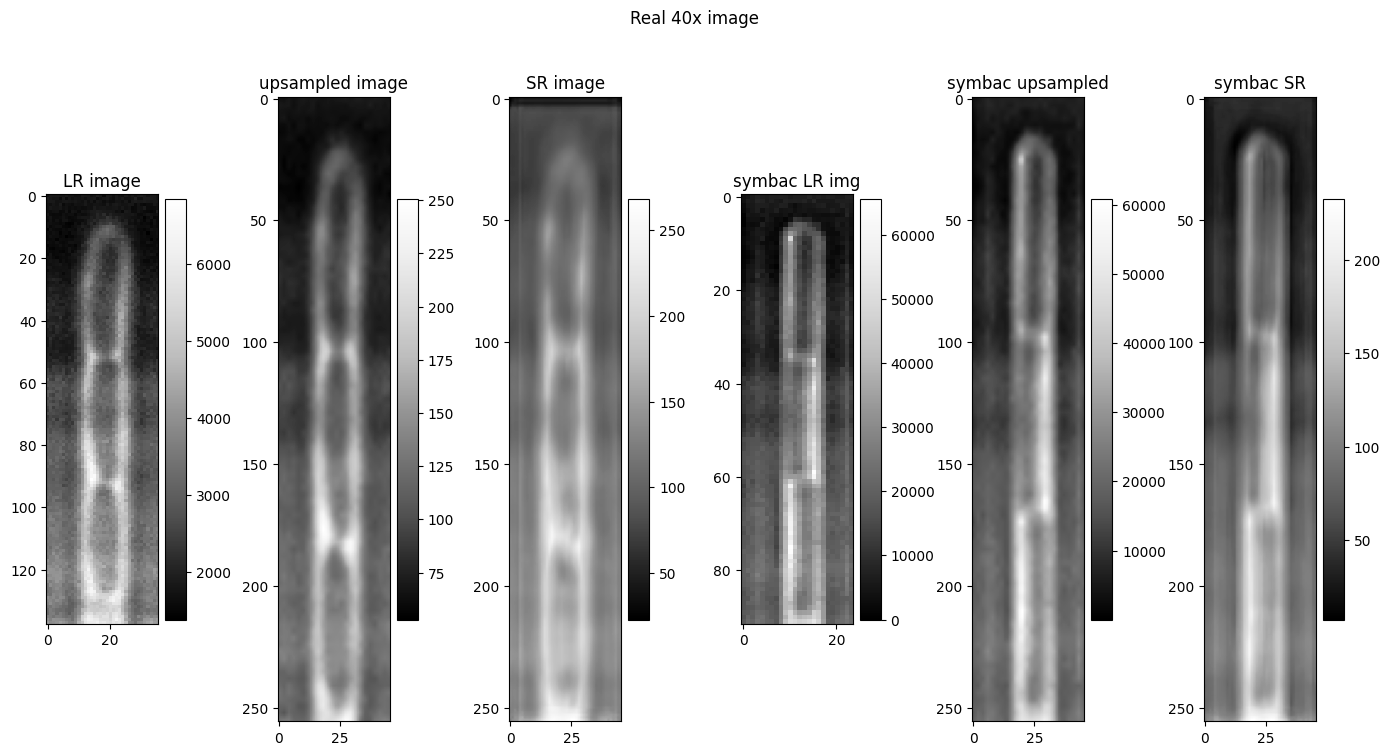

In [34]:
input = img40_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img40_sr = (np.array(SR_MODEL_40(input)).reshape((207,54))*255).astype(int)
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.1638/convolutions/synth_00023_pmc_0.1638.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_40(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 40x image")
ax0 = axs[0].imshow(real_image_list[1],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img40_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img40_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

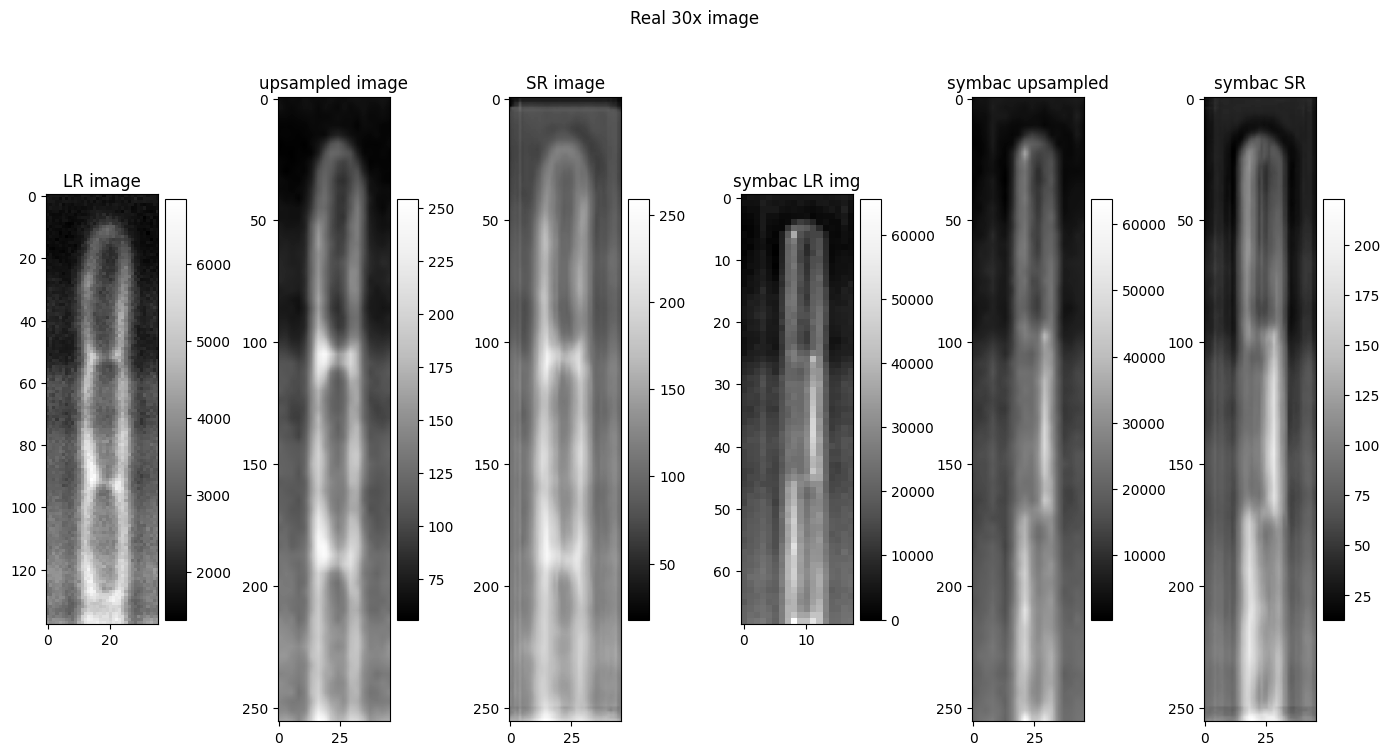

In [35]:
input = img30_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img30_sr = (np.array(SR_MODEL_30(input)).reshape((207,54))*255).astype(int)
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.2184/convolutions/synth_00023_pmc_0.2184.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_30(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 30x image")
ax0 = axs[0].imshow(real_image_list[1],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img30_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img30_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()

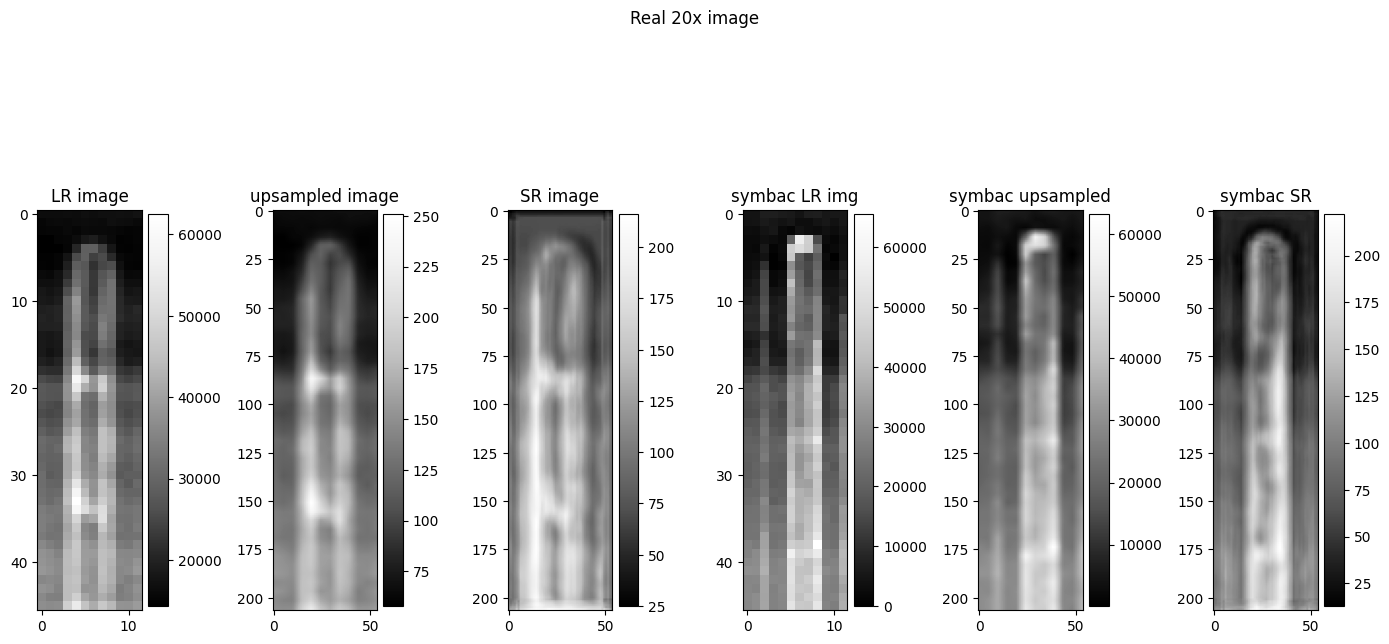

In [48]:
input = img20_upsampled.reshape(1,207,54)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    img20_sr = (np.array(SR_MODEL_20(input)).reshape((207,54))*255).astype(int)
eg1 = tifffile.imread("superres/third_trial/SR_training/test/pmc_0.3276/convolutions/synth_00010_pmc_0.3276.tif")
eg1_upsampled = linear_interpolate(eg1,(207,54),method="linear")
input = eg1_upsampled.reshape(1,207,54)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL_20(input)).reshape((207,54))*255).astype(int)
fig, axs = plt.subplots(1,6,figsize=(14,8))
fig.suptitle("Real 20x image")
ax0 = axs[0].imshow(real_image_list[4],cmap="Greys_r")
axs[0].set_title("LR image")
fig.colorbar(ax0, ax=axs[0])
ax1 = axs[1].imshow(img20_upsampled,cmap="Greys_r")
axs[1].set_title("upsampled image")
fig.colorbar(ax1, ax=axs[1])
ax2 = axs[2].imshow(img20_sr,cmap="Greys_r")
axs[2].set_title("SR image")
fig.colorbar(ax2, ax=axs[2])
ax3 = axs[3].imshow(eg1,cmap="Greys_r")
axs[3].set_title("symbac LR img")
fig.colorbar(ax3, ax=axs[3])
ax4 = axs[4].imshow(eg1_upsampled,cmap="Greys_r")
axs[4].set_title("symbac upsampled")
fig.colorbar(ax4, ax=axs[4])
ax5 = axs[5].imshow(eg1_sr,cmap="Greys_r")
axs[5].set_title("symbac SR")
fig.colorbar(ax5, ax=axs[5])
fig.tight_layout()
plt.show()